Q1 The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation refers to the spread out of data in a sample or population are from the mean of the data. The larger standard deviation,the data is more spread out and has more extreme value. Conversely, a smaller standard deviation means the data is more clustered and has less extreme value.

The standard error of mean refers to the variance of sample mean from different samples ,and their "population" are same. The larger sample size would decrease standard error and the smaller standard error means the sample mean is closer to the true population mean. It is used to judge the precision of the sample mean compared to the true population mean.


LINK:https://chatgpt.com/share/66fdb646-2d0c-8012-ac6e-95dc3ecc4411



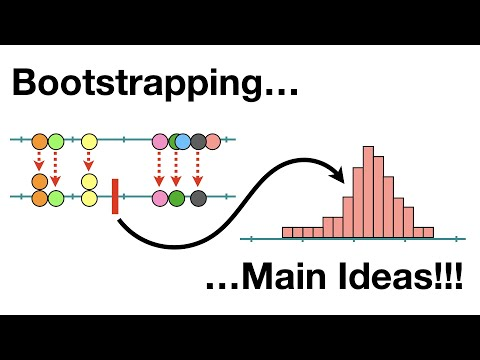

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Q2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.


First of all, we need to calculate the new standard deviation of the new sample data of mean. Then, calculate the standard error of mean by using this formula : standard deviation/ square root sample size. Finally, using 95% confidence interval and the formula which is CI=[Mean−(1.96×SEM),Mean+(1.96×SEM)] to construct the confidence interval.

https://chatgpt.com/share/66fdbb41-e3a8-8012-9d6b-f73d93ef1aa2

Q3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.



Initially, we need to resample data with replacement to generate a new sample data. The size of new sample is same as the origin sample. Also, we need to repeat the step more than 1000 at least to ensure the estimate becomes reliable. After that, usingnp.quantile(bootstrap_means, [0.025, 0.975]) to set 95% confidence interval.

Q4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).


https://chatgpt.com/share/66fdf16d-15e0-8012-ade0-3b93fa747aea


In [2]:
import numpy as np

def bootstrap_ci(data, stat_function=np.mean, n_resamples=1000, ci=95):
    """Compute the bootstrap confidence interval for a statistic."""
    resampled_stats = []
    
    
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)# Generate resampling with replacement data
        resampled_stats.append(stat_function(resample))
    
    
    lower_bound = np.percentile(resampled_stats, (100 - ci) / 2)#Using no.percentile to set 95% confidence interval
    upper_bound = np.percentile(resampled_stats, ci + (100 - ci) / 2)
    
    return lower_bound, upper_bound

#Creating a random sample data
data = [12, 15, 14, 10, 13, 9, 16, 11, 14, 18]

# 95% bootstrap CI for the mean
mean_ci = bootstrap_ci(data, stat_function=np.mean)

# 95% bootstrap CI for the median
median_ci = bootstrap_ci(data, stat_function=np.median)

print("95% Bootstrap Confidence Interval for Mean:", mean_ci)
print("95% Bootstrap Confidence Interval for Median:", median_ci)


95% Bootstrap Confidence Interval for Mean: (11.6, 14.902499999999998)
95% Bootstrap Confidence Interval for Median: (11.0, 15.0)


Q5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

First of all, the population parameter is fixed and unknown. We used sample sample statistic as an estimate of true population. In this step, we generate the new sample repeatedly and make a distribution of those new samples. However, the sample statistic does not provide accurate data for population parameter due to sampling variability. Lastly, confidence intervals sets a range of values to estimate population parameter

https://chatgpt.com/share/66fdf8c3-2558-8012-89ba-5ddb0f281cb3

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. 

What is the process of bootstrapping?
What is the main purpose of bootstrapping?
If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?


The process of bootstrapping is that resampling a sample data that I have with replacement. To be specific, we create many new sample data by selecting them from the original data and their sample size are same as the original one. Furthermore, after selecting data from the original one, we need to put it back and then randomly select another data to construct the new sample.

The main purpose is to estimate the true population data when the true population is unkonwn and the we know sample data. 

First of all, I need to use bootstrapping to create numerous sample data at least 1000times based on the sample that I had . Then I calculate the mean of each new sample and make a distribution of those mean. After that, I calculate standard errors and  95% confidence interval to get an estimate of true population.

Q7.The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything".
This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". 

Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? 
Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.



The null hypothesis in this question means "drug has no effect".In the confidence interval of our sample mean, if it contains zero, it demonstrates that it is possible that the drug has no effect on curing the disease in true populatiion parameter. As long as there is an example of occuring no effect of the drug, we can not exclude the null hypothesis. 






Q9

Firstly, I have a sample which includes 5 columns and 10 rows. We want to analyze the effect of the vaccine on patients and give evidence for whether or not the vaccine is effective. So I need to focus on the difference between the initial health socre and final one. However, I only have one sample so I am going to use bootstrapping to create 1000 new sample at least to ensure the estimate is close to true population data. Then I need to analyze the distribution of new 1000 samples in a 95% confidence interval. Comparing the distribution and the Null hypothesis which is the "no effect"


In [6]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame(data)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df['Difference'] =df['FinalHealthScore']- df['InitialHealthScore']

n_bootstrap_samples = 1000
bootstrap_diff_means = []

for _ in range(n_bootstrap_samples):
    sample = df.sample(len(df), replace=True)
    boot_mean_diff = sample['Difference'].mean()
    bootstrap_diff_means.append(boot_mean_diff)


mean_diff_bootstrap = np.mean(bootstrap_diff_means)
conf_interval_diff95 = np.percentile(bootstrap_diff_means, [2.5, 97.5])




print("Mean of bootstrap means: " , mean_diff_bootstrap) 

print("95% Confidence Interval: " ,conf_interval_diff95 )


fig = go.Figure()
fig.add_trace(go.Box(y=df['InitialHealthScore'], name='Initial Health Score', marker_color='orange'))
fig.add_trace(go.Box(y=df['FinalHealthScore'], name='Final Health Score', marker_color='green'))
fig.update_layout(title='Comparison of Initial and Final Health Scores', yaxis_title='Health Score')

fig.show()

Mean of bootstrap means:  3.3486
95% Confidence Interval:  [0.9 5.6]


In [7]:

mean_diff_bootstrap = np.mean(bootstrap_diff_means)

conf_interval_diff = np.quantile(bootstrap_diff_means, [0.025, 0.075])


fig = go.Figure()
fig.add_trace(go.Histogram(x=bootstrap_diff_means, nbinsx=30, name='Bootstrap Mean Differences', opacity=0.75, marker_color='purple'))

fig.update_layout(title='Distribution of Mean Differences Between Initial and Final Health Scores',
                  xaxis_title='Mean Difference (Initial - Final)',
                  yaxis_title='Frequency',
                  showlegend=True)


fig.show()

Conclusion: after observing the distribution of new 1000 samples in a 95% confidence interval. There are no zeros in the 95% confidence interval so that I can reject the Null hypothesis which is "no effect". The vaccine does have a positive effect on patients as all mean differences between initial and final health scores are greater than 0.

Q9 yes